# Exploratory Data Analysis (EDA) of 

- Q1 ($12.99): 25% of prices are below this
- Q3 ($29.99): 75% of prices are below this
- IQR ($17.00): Range containing middle 50% of prices (Q3-Q1)

Red and White types are the clear market leaders, each with almost 550 units


After cleaning:
Number of rows: 1290
         Price  Type_Red  Type_Rosé  Type_Tawny  Type_White  Grape_0  Grape_1  \
0     0.011764       1.0        0.0         0.0         0.0      0.0      0.0   
1     0.025882       0.0        0.0         0.0         1.0      0.0      0.0   
2     0.017647       0.0        0.0         0.0         1.0      0.0      0.0   
3     0.030588       0.0        0.0         0.0         1.0      0.0      0.0   
4     0.025882       1.0        0.0         0.0         0.0      0.0      0.0   
...        ...       ...        ...         ...         ...      ...      ...   
1264  0.270605       0.0        0.0         0.0         1.0      0.0      0.0   
1265  0.411779       0.0        1.0         0.0         0.0      0.0      0.0   
1266  0.159996       1.0        0.0         0.0         0.0      0.0      0.0   
1267  0.011764       1.0        0.0         0.0         0.0      0.0      0.0   
1268  0.023529       0.0        0.0         0.0         1.0      0.0   

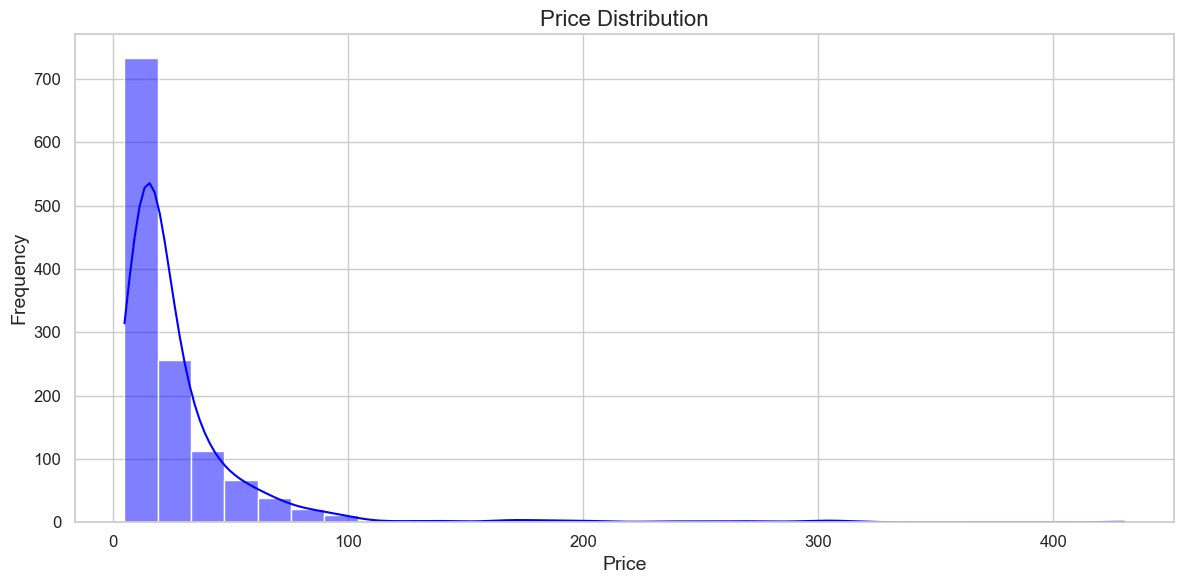

C:\Users\David\AppData\Local\Temp\ipykernel_25980\3570414286.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='cool')


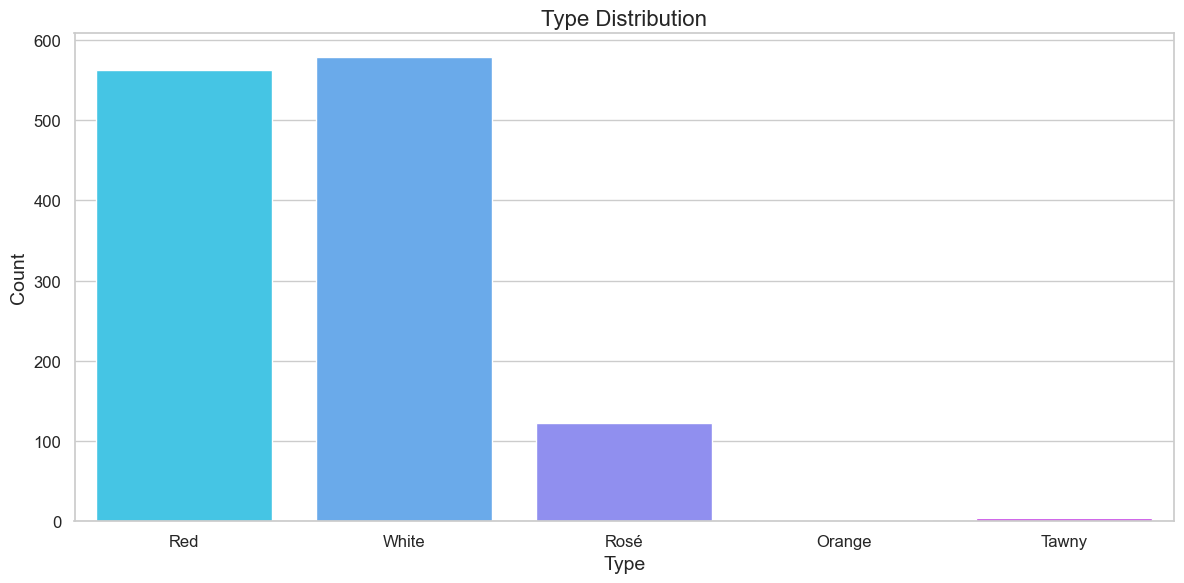

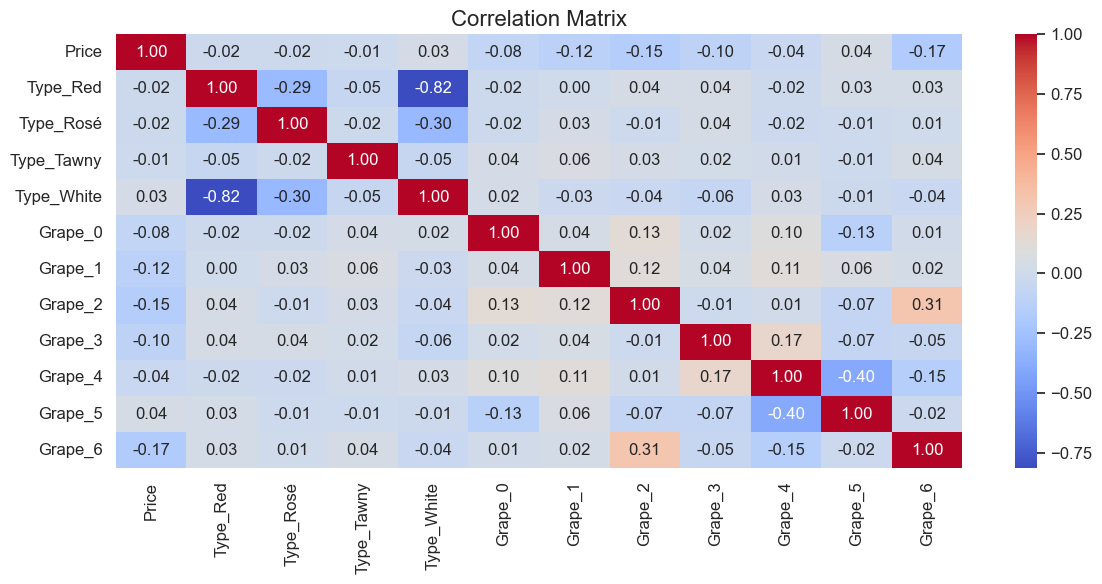

Q1: 12.99
Q3: 29.99
IQR: 17.0
Lower whisker: -12.51
Upper whisker: 55.489999999999995


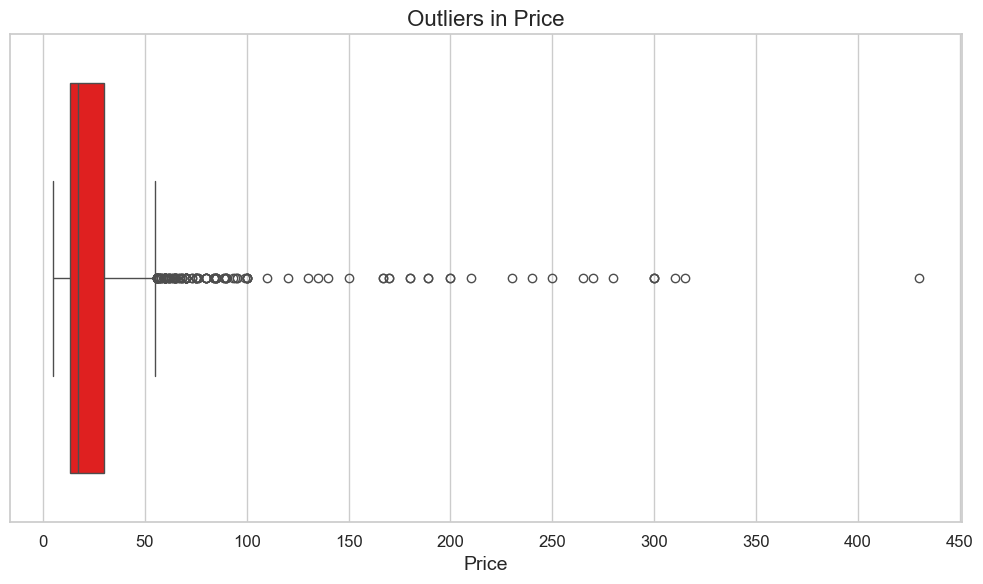

In [152]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ftfy import fix_text

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Seaborn and Matplotlib configurations for modern aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Load dataset
df = pd.read_csv('../datasets/WineDataset.csv')

# Continue with your cleaning steps...
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# Print after cleaning to verify data still exists
print("\nAfter cleaning:")
print("Number of rows:", len(df))

# Select relevant columns
df = df[['Type', 'Grape', 'Price']]

# Clean the 'Price' column by extracting numerical values
df['Price'] = df['Price'].str.replace('£', '', regex=False)        
df['Price'] = df['Price'].str.replace('per bottle', '', regex=False) 

# Remover espaços extras e converter para float
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing or invalid prices
df = df.dropna(subset=['Price'])

# Drop rows with missing values in categorical columns
df = df.dropna(subset=['Type', 'Grape'])



one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['Type']]), columns=one_hot_encoder.get_feature_names_out(['Type']))

# Inicializar o BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Grape'])

# Aplicar a codificação binária
grape_encoded = binary_encoder.fit_transform(df['Grape'])

# Combine all encoded data into a single dataframe
df_encoded = pd.concat([df[['Price']], type_encoded, grape_encoded], axis=1)
df_encoded = df_encoded.dropna()  # Assign the result back

scaler = MinMaxScaler()
df_encoded['Price'] = scaler.fit_transform(df_encoded[['Price']])

print(df_encoded)

# Plot distribution of Price
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot Type Distribution
sns.countplot(x='Type', data=df, palette='cool')
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Matrix Visualization
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Detecting Outliers using Boxplot

# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate whisker boundaries
whisker_min = Q1 - 1.5 * IQR 
whisker_max = Q3 + 1.5 * IQR

# Print IQR statistics
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower whisker: {whisker_min}')
print(f'Upper whisker: {whisker_max}')

# Boxplot
plt.figure(figsize=(10, 6))
max_price = df['Price'].max()
plt.xticks(np.arange(0, max_price + 50, 50))  # Para intervalos de 50
sns.boxplot(x=df['Price'], color='red')
plt.title('Outliers in Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


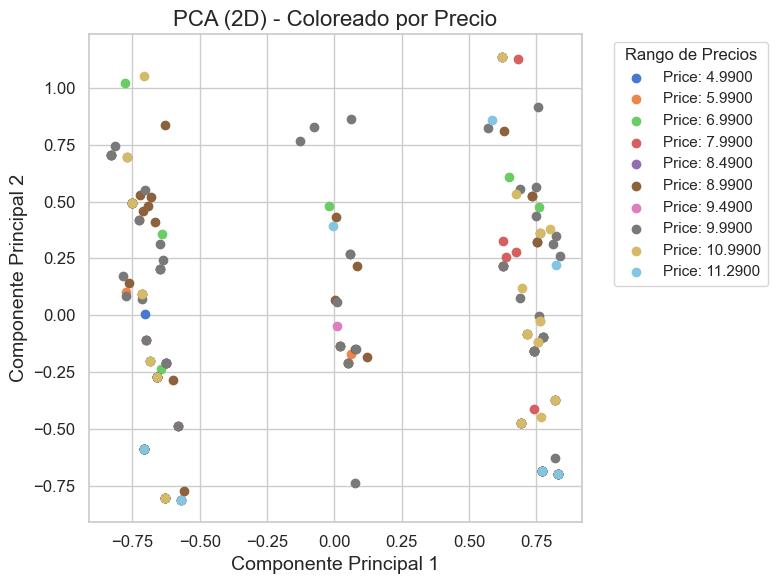

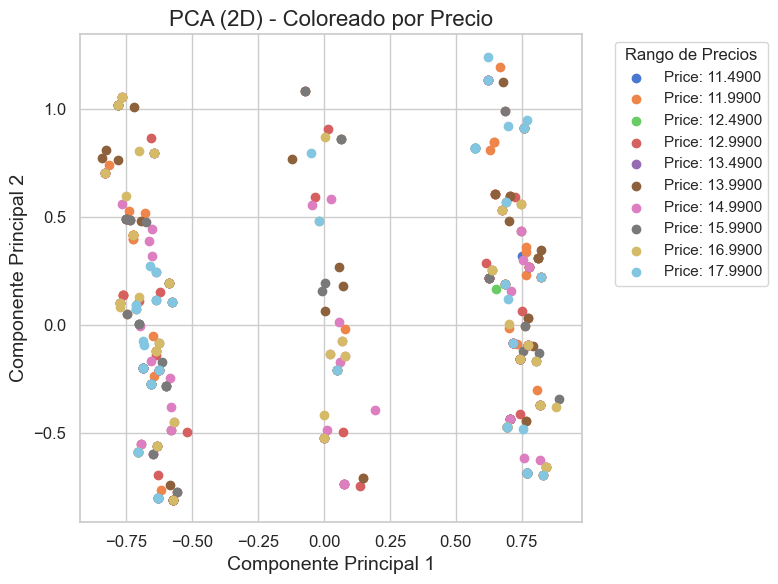

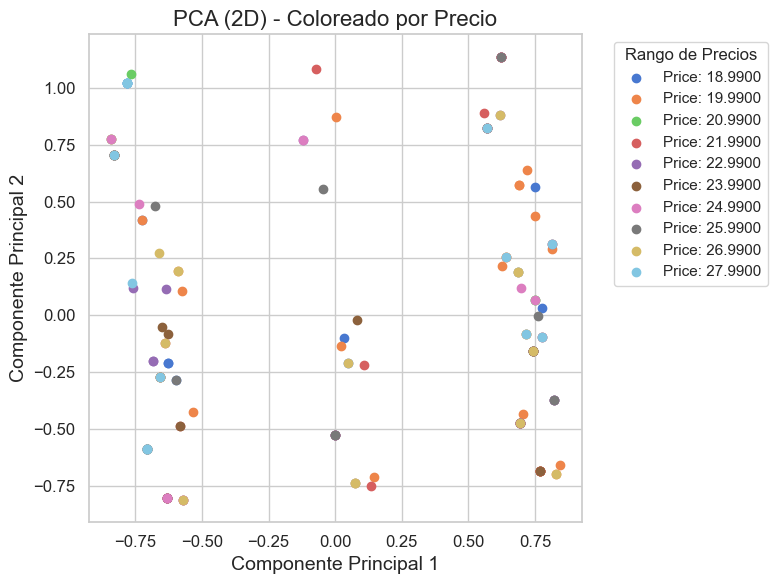

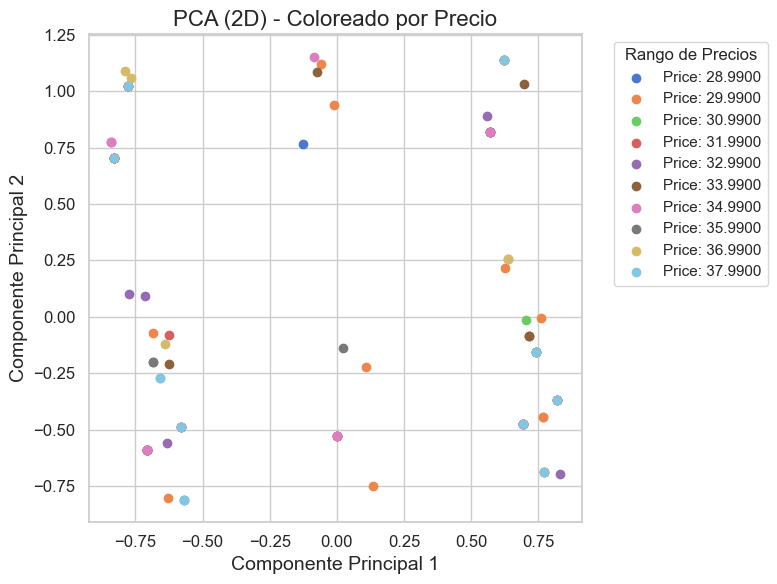

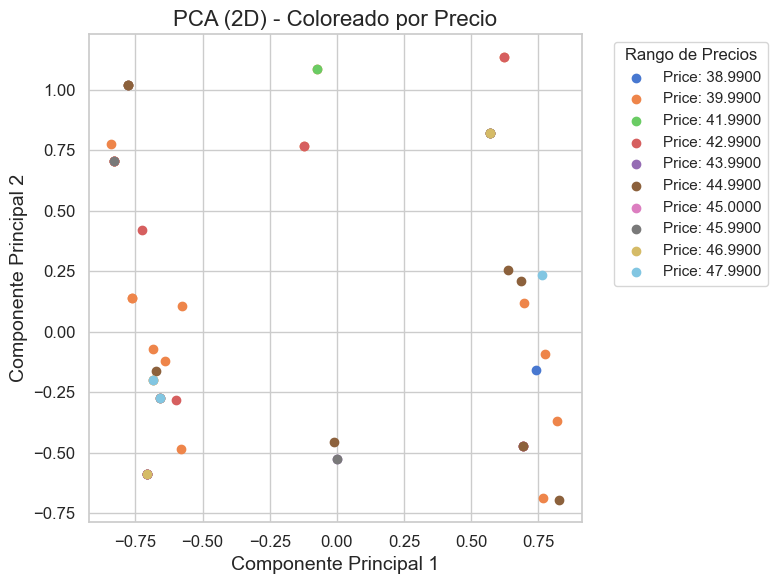

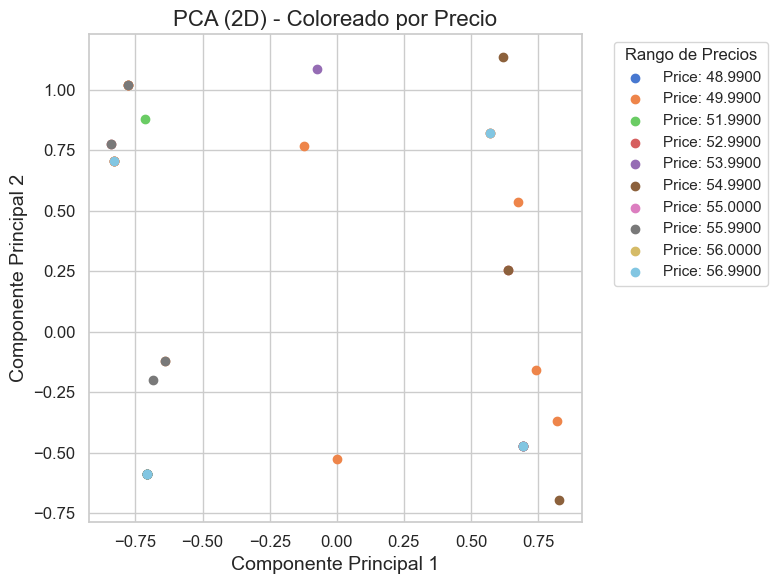

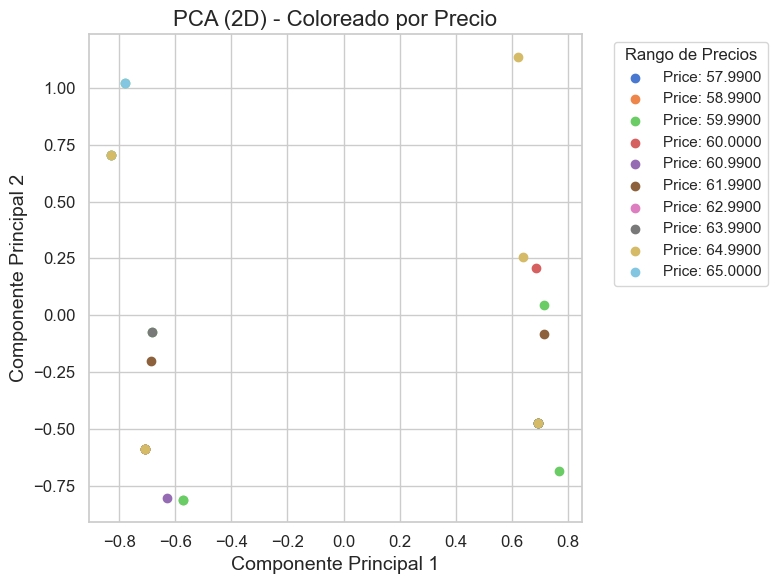

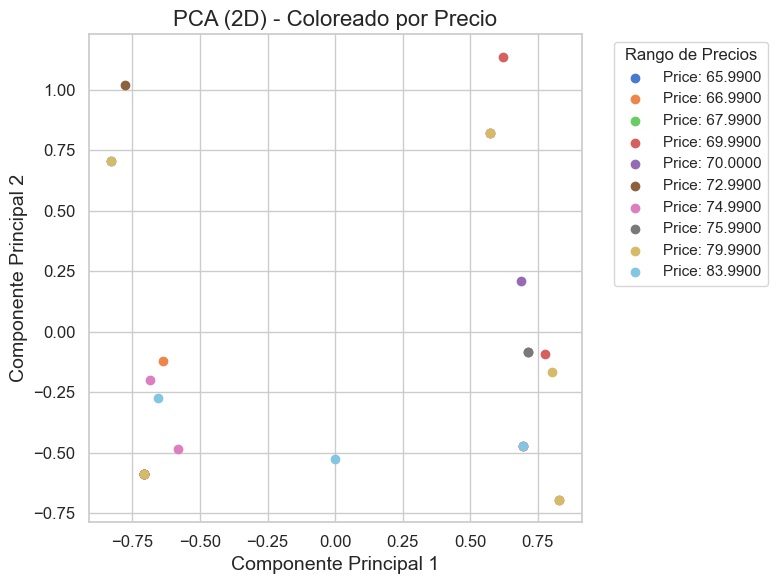

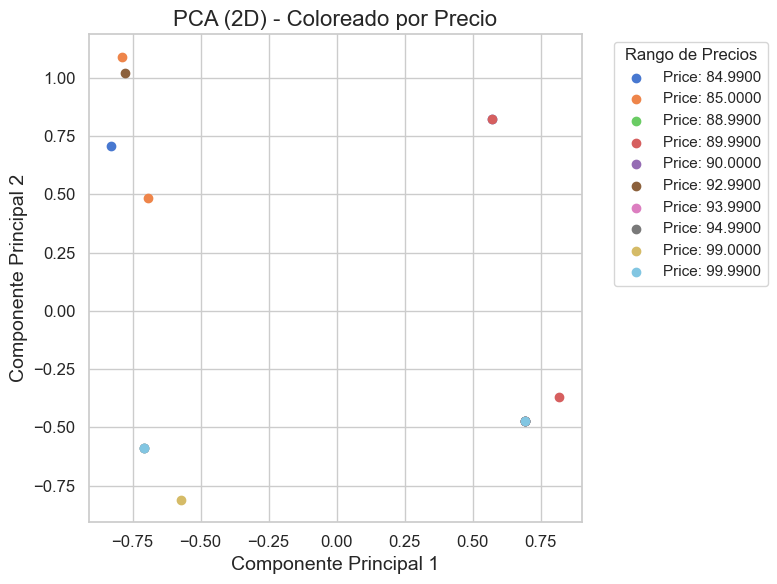

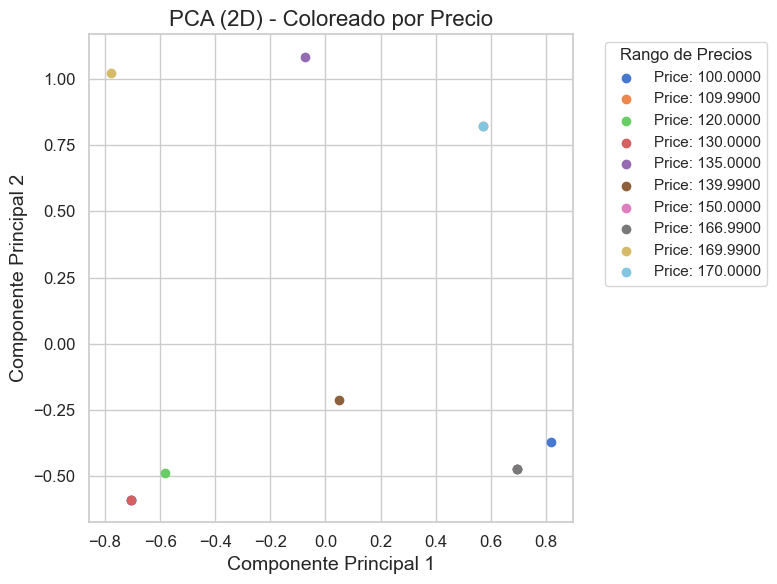

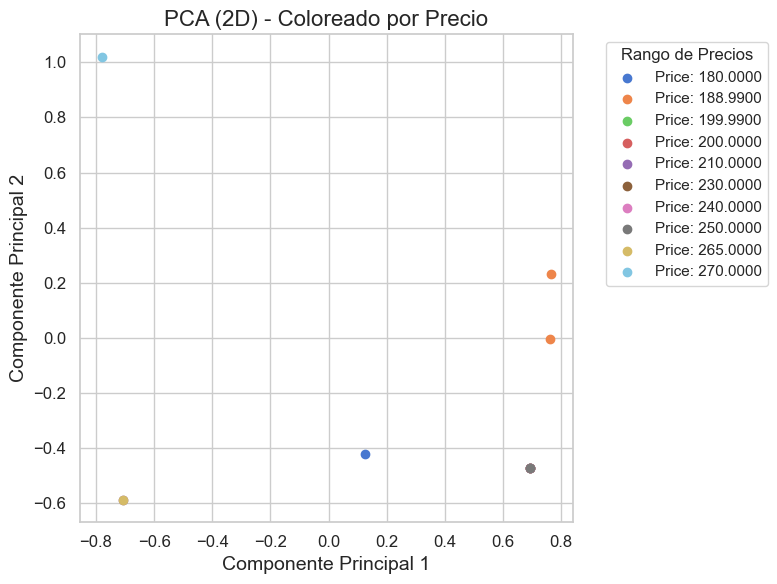

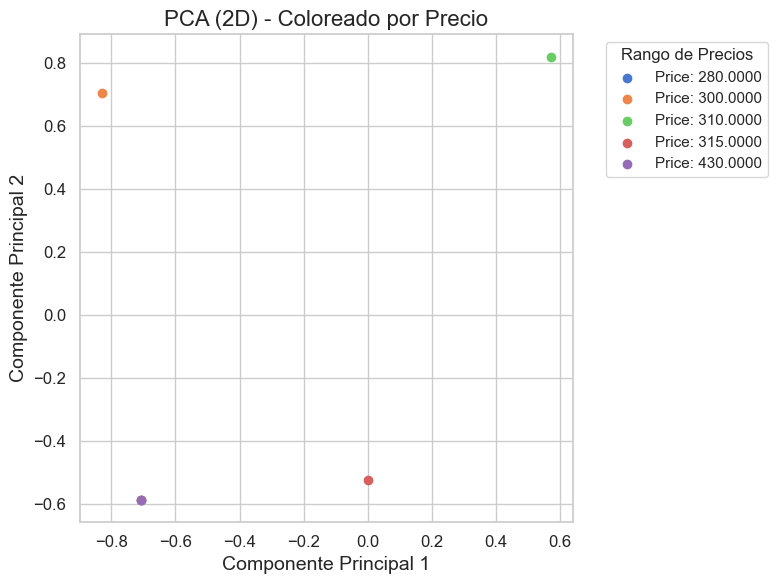

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_encoded['Price'] = df['Price']

df_encoded_clean = df_encoded.dropna()
features = df_encoded_clean.drop(columns=['Price']).values
labels = df_encoded_clean['Price'].values

pca = PCA(n_components=2)
df_pca = pca.fit_transform(features)

unique_labels = np.unique(labels)
step = 10

for i in range(0, len(unique_labels), step):
    plt.figure(figsize=(8, 6))
    subset_labels = unique_labels[i:i + step]
    
    for label in subset_labels:
        indices = np.where(labels == label)[0]
        plt.scatter(
            df_pca[indices, 0],
            df_pca[indices, 1],
            label=f'Price: {label:.4f}'
        )
    
    plt.title('PCA (2D) - Coloreado por Precio')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='Rango de Precios', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [154]:
print(df_encoded)

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



       Price  Type_Red  Type_Rosé  Type_Tawny  Type_White  Grape_0  Grape_1  \
0       9.99       1.0        0.0         0.0         0.0      0.0      0.0   
1      15.99       0.0        0.0         0.0         1.0      0.0      0.0   
2      12.49       0.0        0.0         0.0         1.0      0.0      0.0   
3      17.99       0.0        0.0         0.0         1.0      0.0      0.0   
4      15.99       1.0        0.0         0.0         0.0      0.0      0.0   
...      ...       ...        ...         ...         ...      ...      ...   
1264  120.00       0.0        0.0         0.0         1.0      0.0      0.0   
1265  180.00       0.0        1.0         0.0         0.0      0.0      0.0   
1266   72.99       1.0        0.0         0.0         0.0      0.0      0.0   
1267    9.99       1.0        0.0         0.0         0.0      0.0      0.0   
1268   14.99       0.0        0.0         0.0         1.0      0.0      0.0   

      Grape_2  Grape_3  Grape_4  Grape_5  Grape_6  

# Model Polynomial Regression Price not Encoded

In [155]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit model
model = LinearRegression()
model.fit(X_poly, y_train)

# Print metrics
print('R² score:', model.score(X_poly_test, y_test))
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Predict prices
y_pred = model.predict(X_poly_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


R² score: -2.9128660761921442e+23
Coefficients: [-3.41970972e+10  4.42707366e+14  3.75567432e+13  1.93412776e+14
 -6.42618591e+13 -1.89426505e+14  7.93840895e+14 -3.14178961e+14
 -2.92765455e+14 -1.87929436e+15  9.03213911e+13  1.95111962e+14
 -6.18406738e+14  7.40341974e+13  3.73140579e+13 -3.36392832e+13
  2.23755694e+13  4.34200850e+14  2.75543270e+14 -3.46038779e+14
  4.66824823e+14 -2.93326631e+14 -9.98438980e+13 -2.13256115e+14
 -4.53089693e+13  4.30552776e+12  2.23755694e+13  4.34200850e+14
  2.75543270e+14 -3.46038779e+14  4.66824823e+14 -2.93326631e+14
 -9.98438980e+13  1.05494849e+13  1.25481435e+13 -1.67373259e+13
 -1.44038318e+13 -2.65567957e+13 -3.46038779e+14  3.69726210e+13
 -1.15869811e+13 -1.05404335e+13 -1.11437513e+14  2.23755694e+13
  4.34200850e+14  2.75543270e+14 -3.46038779e+14  4.66824823e+14
 -2.93326631e+14 -9.98438980e+13  1.67050935e+14  1.06250000e+01
  4.93750000e+00  1.00000000e+01  6.81250000e+00 -2.06250000e+00
  5.56250000e+00 -1.22804174e+15 -9.375000

# Linear Model Regression Price not Encoded

In [156]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Fit linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Print metrics
print('R² score:', model.score(X_test, y_test))
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# MAE (Mean Absolute Error), MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) metrics


# Predict prices
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R² score: 0.041710904972037666
Coefficients: [ 11.84269442  11.39546118  25.96715585  13.17696388  -8.55100182
 -10.34041915  -5.61118768  -8.40534112   0.0745678    0.22764967
 -11.95705558]
Intercept: 26.558243259397045
MAE: 18.732672659122457
MSE: 1148.4617356316276
RMSE: 33.88896185532433


# Linear and Polynomial Regression Model Price Encoded

In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Linear Regression with scaled features
linear_model = LinearRegression()
linear_model.fit(X_scaled, y_train)

# Polynomial Regression with scaled features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_poly_test = poly.transform(X_scaled_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Print metrics
print("Linear Regression Results:")
print('R² score:', linear_model.score(X_scaled_test, y_test))
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

print("\nPolynomial Regression Results:")
print('R² score:', poly_model.score(X_poly_test, y_test))
print('Coefficients:', poly_model.coef_)
print('Intercept:', poly_model.intercept_)

# Predict prices
y_pred = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print('\nLinear Regression Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

# Calculate metrics for polynomial regression
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)

# Print metrics
print('\nPolynomial Regression Metrics:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)



Linear Regression Results:
R² score: 0.041710904972037666
Coefficients: [ 5.88728459  3.32701404  1.42085314  6.5622839  -2.32088841 -3.46758517
 -2.42401395 -3.98264889  0.03641021  0.11063073 -5.83843082]
Intercept: 28.201461461461466

Polynomial Regression Results:
R² score: -1.1791910129308061e+23
Coefficients: [ 2.91729218e+08 -1.47843296e+13 -2.75421708e+12  1.36787814e+11
 -1.41600686e+13  3.35872734e+12 -1.41327358e+12  4.65732523e+12
 -5.49200410e+12 -3.70350063e+12  1.68985122e+12 -3.77595002e+11
  1.67914842e+12 -1.32338041e+10  1.13716442e+13 -1.63089472e+12
  6.30044060e+11  3.40072755e+12  2.73832824e+12 -2.37683653e+12
 -4.15742147e+12  3.22508257e+10  4.23814159e+12  4.71913613e+11
  8.93585176e+11  7.08459216e+12  3.70023360e+11  1.99723910e+12
  1.60821359e+12 -1.39591038e+12 -2.44164362e+12  1.89408323e+10
  2.48905036e+12 -2.46412113e+11 -5.55515967e+12  2.79280961e+12
  1.00562280e+13 -1.00264329e+13 -2.61613177e+11 -9.86862838e+11
  1.94053223e+12  4.26972677e+11 

c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Linear Regression Model Price Encoded and with Log transformation

In [158]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare data with log transformation of price
X = df_encoded.drop('Price', axis=1).values
y = np.log1p(df_encoded['Price'].values)  # log1p handles zero values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Fit model
model = LinearRegression()
model.fit(X_scaled, y_train)

# Predictions (need to transform back)
y_pred = np.expm1(model.predict(X_scaled_test))

# Print metrics
print('R² score:', model.score(X_scaled_test, y_test))

# Predict prices
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


R² score: 0.08826783901083535
MAE: 0.5658277068667353
MSE: 0.46875689666110365
RMSE: 0.684658233472076


# Polynomial Regression Model Price Encoded and with Log transformation

In [159]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_poly_test = poly.transform(X_scaled_test)

model = LinearRegression()
model.fit(X_poly, y_train)

y_pred = np.expm1(model.predict(X_poly_test))

print('R² score:', model.score(X_poly_test, y_test))

# Predict prices
y_pred = model.predict(X_poly_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


R² score: -6.117660409593288e+24
MAE: 109412099359.11154
MSE: 2.8401484259345513e+24
RMSE: 1685273991354.0918


C:\Users\David\AppData\Local\Temp\ipykernel_25980\1241320292.py:12: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(model.predict(X_poly_test))


In [160]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Prepare data
X = df_encoded.drop('Price', axis=1).values
y = np.log1p(df_encoded['Price'].values)

# Ridge Regression with CV
ridge_pipe = Pipeline([
   ('scaler', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
   ('ridge', Ridge(alpha=1.0))
])

ridge_scores = cross_val_score(ridge_pipe, X, y, cv=5)
print("Ridge CV scores:", ridge_scores)
print("Ridge mean CV score:", ridge_scores.mean())

# Lasso Regression with CV
lasso_pipe = Pipeline([
   ('scaler', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
   ('lasso', Lasso(alpha=1.0))
])

lasso_scores = cross_val_score(lasso_pipe, X, y, cv=5)
print("\nLasso CV scores:", lasso_scores)
print("Lasso mean CV score:", lasso_scores.mean())

# ElasticNet with CV
elastic_pipe = Pipeline([
   ('scaler', StandardScaler()),
   ('poly', PolynomialFeatures(degree=2)),
   ('elastic', ElasticNet(alpha=1.0, l1_ratio=0.5))
])

elastic_scores = cross_val_score(elastic_pipe, X, y, cv=5)
print("\nElasticNet CV scores:", elastic_scores)
print("ElasticNet mean CV score:", elastic_scores.mean())

Ridge CV scores: [-0.12282825 -0.0740092   0.05343239  0.22131528  0.07279634]
Ridge mean CV score: 0.0301413116838521

Lasso CV scores: [-0.24221659 -0.170809   -0.02495019 -0.00537446 -0.13484805]
Lasso mean CV score: -0.11563965727397271

ElasticNet CV scores: [-0.24221659 -0.170809   -0.02495019 -0.00537446 -0.13484805]
ElasticNet mean CV score: -0.11563965727397271


In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 150, 200, 250, 300, 350, 1000]}
grid_search = GridSearchCV(ridge_pipe, param_grid, cv=5)
grid_search.fit(X, y)

print("Best alpha:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best alpha: {'ridge__alpha': 250}
Best score: 0.04608546070723942
